In [1]:
from voxel import *

In [2]:
# Calculate coordinates of two atoms in rhombus
# a = 1
# alpha = 45 deg = pi/4
f = 2 * np.sin(np.pi/8)
e = np.cos(np.pi/8)
r = f*np.sqrt(4-f**2)/(4+2*f)

x1 = np.cos(np.pi/8)*(e-r)
y1 = np.sin(np.pi/8)*(e-r)
print(x1, y1)

x2 = np.cos(np.pi/8)*(e+r)
y2 = np.sin(np.pi/8)*(e+r)
print(x2, y2)

0.6173165676349102 0.2557008945919878
1.0897902135516373 0.4514058865945597


In [3]:
# matrix corresponding to unit cell (columns are primitive unit vectors)
A = np.array([
    [1., np.sqrt(0.5)],
    [0., np.sqrt(0.5)]
]) * 3

# atom coordinates
mus = np.array([[x1,y1], [x2, y2]])*3

# standard deviation for the Gaussians
sigma = 0.3

# get the field quantity as function
gauss = get_nD_gaussian(A, mus, sigma, 3)

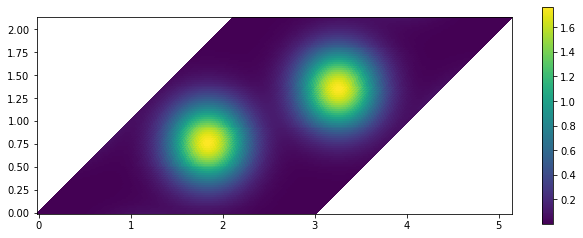

In [4]:
# evaluate the field over the unit cell, n specifies precision
R, SR = bravais_lattice(gauss, A, n=101)
plot_2D_realspace_lattice(A, R, SR)

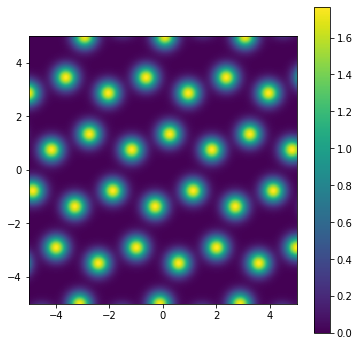

In [5]:
# periodicity in real space
n = 501
xi = np.linspace(-5,5,n)

x1, x2 = np.meshgrid(xi, xi)
X = np.vstack((x1.reshape(1,-1), x2.reshape(1,-1)))


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.pcolormesh(X[0,:].reshape(n,n), X[1,:].reshape(n,n), gauss(X).reshape(n,n), shading='auto')    
plt.colorbar()
plt.show()

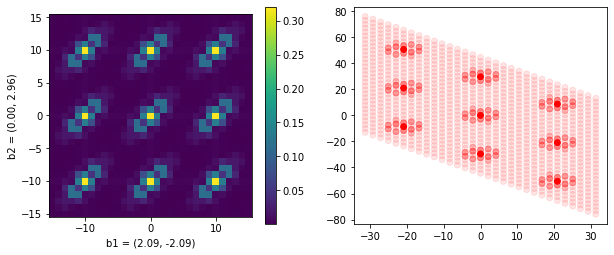

In [6]:
# periodicity in reciprocal space, due to discretisation (DFT)
mx = np.arange(-15,16)
my = np.arange(-15,16)
B, G, SG = reciprocal_lattice(gauss, A, mx, my, n=11) # numerically
plot_2D_reciprocal_lattice(B, mx, my, G, SG)

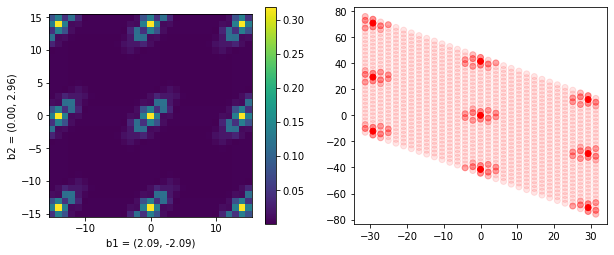

In [7]:
# The denser the voxel density in the real space (larger n),
# the longer the periodicity in reciprocal space
mx = np.arange(-15,16)
my = np.arange(-15,16)
B, G, SG = reciprocal_lattice(gauss, A, mx, my, n=15) # numerically
plot_2D_reciprocal_lattice(B, mx, my, G, SG)

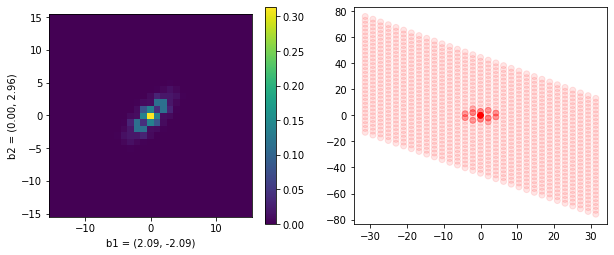

In [8]:
# no periodicity in reciprocal space when using theoretical fourier transfrom
mx = np.arange(-15,16)
my = np.arange(-15,16)
B, G, SG = reciprocal_lattice_gaussian(A, mus, sigma, mx, my) # theoretically
plot_2D_reciprocal_lattice(B, mx, my, G, SG)

## Equivariances / Invariances

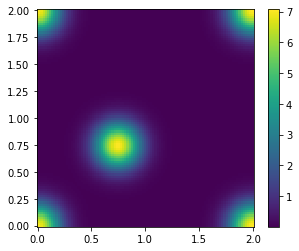

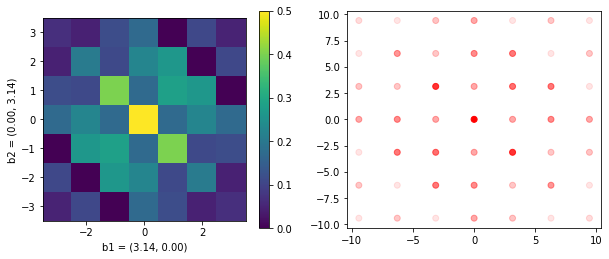

In [9]:
A = np.array([
    [2., 0.],
    [0., 2.]
])

# atom coordinates
mus = np.array([[0.,0.], [0.75, 0.75]])

# standard deviation for the Gaussians
sigma = 0.15

# get the field quantity as function
gauss = get_nD_gaussian(A, mus, sigma, 3)

R, SR = bravais_lattice(gauss, A, n=101)
plot_2D_realspace_lattice(A, R, SR)

mx = np.arange(-3,4)
my = np.arange(-3,4)
B, G, SG = reciprocal_lattice_gaussian(A, mus, sigma, mx, my)
plot_2D_reciprocal_lattice(B, mx, my, G, SG)

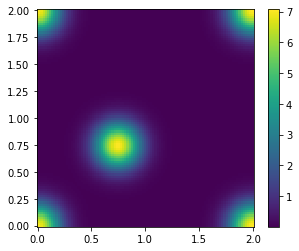

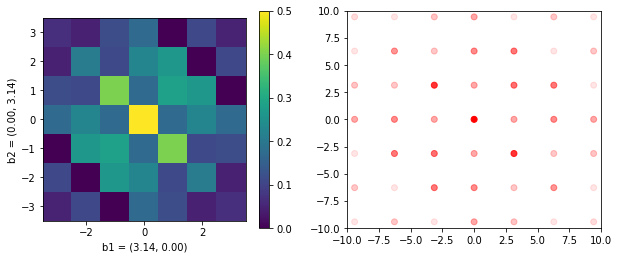

Diff: 6.535834006958017e-16


In [10]:
# invariance with respect to atom coordinates

# A remains the same

mus2 = np.array([[0.,0.] + A.dot([1,1]), [0.75, 0.75] + A.dot([2,-3])])


# get the field quantity as function
gauss = get_nD_gaussian(A, mus2, sigma, 3)

R, SR = bravais_lattice(gauss, A, n=101)
plot_2D_realspace_lattice(A, R, SR)

B2, G2, SG2 = reciprocal_lattice_gaussian(A, mus2, sigma, mx, my) 
plot_2D_reciprocal_lattice(B2, mx, my, G2, SG2, xlims=(-10,10), ylims=(-10,10))

# for g = B dot (i,j) , g2 = B2 dot (i,j) it holds h(g) = h2(g2)
# so we check the following
print("Diff:", np.max(np.abs(SG2 - SG)))

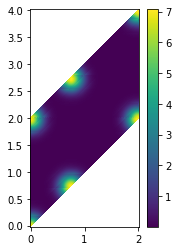

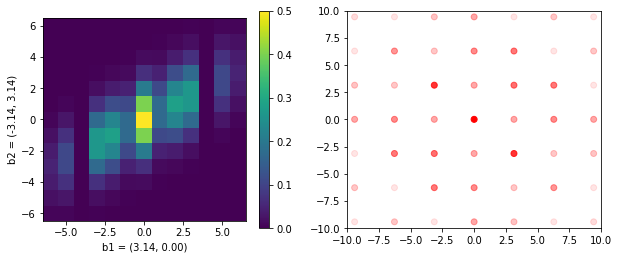

Diff:  0.0


In [11]:
# invariance with respect to unit cell
A2 = np.array([
    [2., 0.],
    [2., 2.]
])

# mus remain the same

# get the field quantity as function
gauss = get_nD_gaussian(A2, mus, sigma, 3)

R, SR = bravais_lattice(gauss, A2, n=101)
plot_2D_realspace_lattice(A2, R, SR)

mx2 = np.arange(-6,7)
my2 = np.arange(-6,7)
B2, G2, SG2 = reciprocal_lattice_gaussian(A2, mus, sigma, mx2, my2)
plot_2D_reciprocal_lattice(B2, mx2, my2, G2, SG2, xlims=(-10,10), ylims=(-10,10))


# for g = B dot (i,j) it holds h(g) = h2(g)
# so we check the following
diff = 0.
for i in range(G.shape[1]):
    # find match in G2
    for j in range(G2.shape[1]):
        if np.linalg.norm(G[:,i] - G2[:,j]) < 1e-9:
            # print(G[:,i], np.abs(SG[i]), G2[:,j], np.abs(SG2[j]), np.abs(SG[i] - SG2[j]))
            diff = max(diff, np.abs(SG[i] - SG2[j]))
            
print("Diff: ", diff)

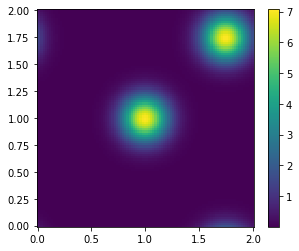

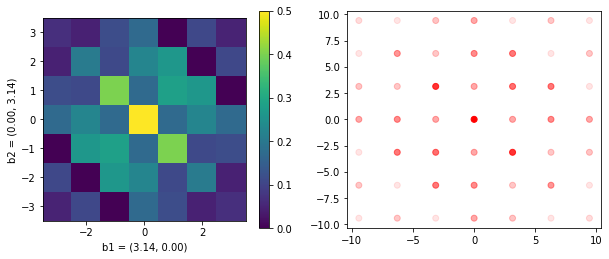

Diff: 9.71445146547012e-17


In [12]:
# (absolution value) invariance with respect to translation

# A remains the same

# atom coordinates
trans_mus = mus + 1.

# get the field quantity as function
gauss = get_nD_gaussian(A, trans_mus, sigma, 3)

R, SR = bravais_lattice(gauss, A, n=101)
plot_2D_realspace_lattice(A, R, SR)

trans_B, trans_G, trans_SG = reciprocal_lattice_gaussian(A, trans_mus, sigma, mx, my)
plot_2D_reciprocal_lattice(trans_B, mx, my, trans_G, trans_SG)

# for g = B dot (i,j) dot (i,j) it holds abs(h(g)) = abs(h2(g))
# so we check the following
print("Diff:", np.max(np.abs(np.abs(trans_SG) - np.abs(SG))))

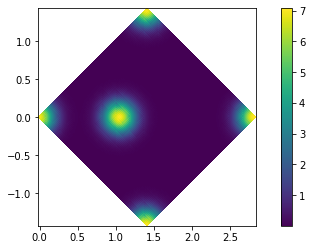

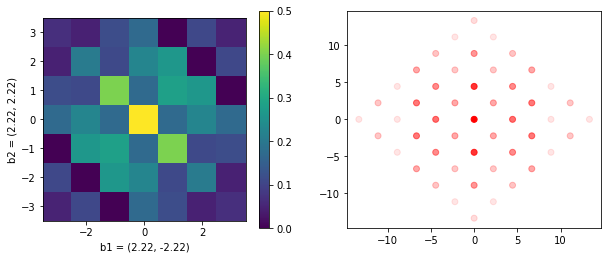

Diff: 1.942890293094024e-16


In [13]:
# equivariance with respect to rotations

rot = np.array([
    [np.cos(np.pi/4), np.sin(np.pi/4)],
    [-np.sin(np.pi/4), np.cos(np.pi/4)]
]) # 45 degrees to left

rot_A = rot.dot(A)

# atom coordinates
rot_mus = mus.dot(rot.T)

# get the field quantity as function
gauss = get_nD_gaussian(rot_A, rot_mus, sigma, 3)

R, SR = bravais_lattice(gauss, rot_A, n=101)
plot_2D_realspace_lattice(rot_A, R, SR)

rot_B, rot_G, rot_SG = reciprocal_lattice_gaussian(rot_A, rot_mus, sigma, mx, my)
plot_2D_reciprocal_lattice(rot_B, mx, my, rot_G, rot_SG)

# for g = B dot (i,j) , g2 = B2 dot (i,j) it holds h(g) = h2(g2)
# so we check the following
print("Diff:", np.max(np.abs(rot_SG - SG)))

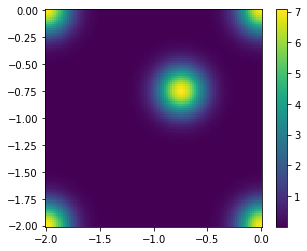

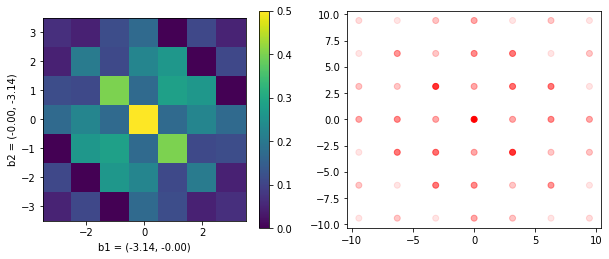

Diff: 0.0


In [14]:
# equivariance with respect to reflection

ref = np.array([
    [-1, 0],
    [0, -1]
])

ref_A = ref.dot(A)

# atom coordinates
ref_mus = mus.dot(ref.T)

# get the field quantity as function
gauss = get_nD_gaussian(ref_A, ref_mus, sigma, 3)

R, SR = bravais_lattice(gauss, ref_A, n=101)
plot_2D_realspace_lattice(ref_A, R, SR)

ref_B, ref_G, ref_SG = reciprocal_lattice_gaussian(ref_A, ref_mus, sigma, mx, my)
plot_2D_reciprocal_lattice(ref_B, mx, my, ref_G, ref_SG)

# for g = B dot (i,j) , g2 = B2 dot (i,j) it holds h(g) = h2(g2)
# so we check the following
print("Diff:", np.max(np.abs(ref_SG - SG)))

### Second example for rotations

In [15]:
# Calculate coordinates of two atoms in rhombus
# a = 1
# alpha = 45 deg = pi/4
f = 2 * np.sin(np.pi/8)
e = np.cos(np.pi/8)
r = f*np.sqrt(4-f**2)/(4+2*f)

x1 = np.cos(np.pi/8)*(e-r)
y1 = np.sin(np.pi/8)*(e-r)
print(x1, y1)

x2 = np.cos(np.pi/8)*(e+r)
y2 = np.sin(np.pi/8)*(e+r)
print(x2, y2)

0.6173165676349102 0.2557008945919878
1.0897902135516373 0.4514058865945597


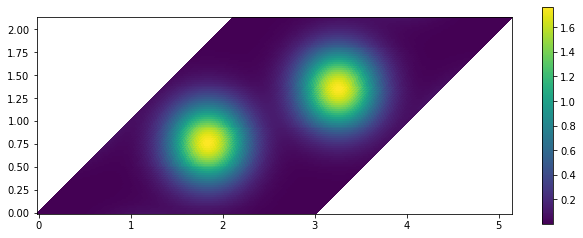

In [16]:
A = np.array([
    [1., np.sqrt(0.5)],
    [0., np.sqrt(0.5)]
]) * 3

# atom coordinates
mus = np.array([[x1,y1], [x2, y2]])*3

# standard deviation for the Gaussians
sigma = 0.3

# get the field quantity as function
gauss = get_nD_gaussian(A, mus, sigma, 3)


R, SR = bravais_lattice(gauss, A, n=101)
plot_2D_realspace_lattice(A, R, SR)
mx = np.arange(-3,4)
my = np.arange(-3,4)
B, G, SG = reciprocal_lattice_gaussian(A, mus, sigma, mx, my)

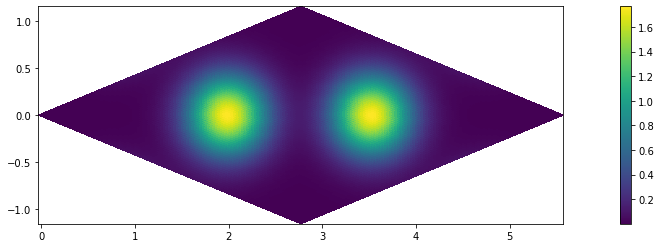

Diff: 1.9610404224179526e-16


In [17]:
# rotations
rot = np.array([
    [np.cos(np.pi/8), np.sin(np.pi/8)],
    [-np.sin(np.pi/8), np.cos(np.pi/8)]
])

A_rot = rot.dot(A)

rot_mus = mus.dot(rot.T)

gauss = get_nD_gaussian(A_rot, rot_mus, sigma, 3)

R, SR = bravais_lattice(gauss, A_rot, n=101)
plot_2D_realspace_lattice(A_rot, R, SR)

mx = np.arange(-3,4)
my = np.arange(-3,4)
B_rot, G_rot, SG_rot = reciprocal_lattice_gaussian(A_rot, rot_mus, sigma, mx, my)

# for g = B dot (i,j) , g2 = B2 dot (i,j) it holds h(g) = h2(g2)
# so we check the following
print("Diff:", np.max(np.abs(SG_rot - SG)))

In [18]:
A_rot, A.dot(rot)

(array([[ 2.7716386,  2.7716386],
        [-1.1480503,  1.1480503]]),
 array([[ 1.95984445,  3.10789474],
        [-0.81179415,  1.95984445]]))

In [19]:
B_rot, B.dot(rot), 2*np.pi*np.linalg.inv(A.dot(rot)).T

(array([[ 1.13347846,  1.13347846],
        [-2.73645907,  2.73645907]]),
 array([[ 1.93496877,  0.80149031],
        [-3.06844723,  1.93496877]]),
 array([[ 1.93496877,  0.80149031],
        [-3.06844723,  1.93496877]]))